In [14]:
import numpy as np
import h5py
import pandas as pd
from matplotlib import pyplot as plt


g=9.8  #m/s/s
Rd=287.  #J/kg/K

def calcScaleHeight(temp,press,z):
    """
      input temp (K), press (pa), z(m)
      output 1/H in inverse meters
    """
    dz=np.diff(z)
    #
    # use the average temperature between two levels
    #
    TLayer=(temp[1:] + temp[0:-1])/2.
    #
    #  see eqn. 11 of the Day 8 scale height notes
    #
    oneOverH=g/(Rd*TLayer)
    Zthick=z[-1] - z[0]
    oneOverHbar=np.sum(oneOverH*dz)/Zthick
    return oneOverHbar

def calcDensHeight(temp,press,z):
    """
      input temp (K), press (pa), z(m)
      output 1/H in inverse meters for rho(z)
    """
    dz=np.diff(z)
    TLayer=(temp[1:] + temp[0:-1])/2.
    dTdz=np.diff(temp)/np.diff(z)
    oneOverH=g/(Rd*TLayer) + 1/TLayer*dTdz
    Zthick=z[-1] - z[0]
    oneOverHbar=np.sum(oneOverH*dz)/Zthick
    return oneOverHbar


In [15]:
#put your sounding file from newsoundings.ipynb here
name='september.h5'

#
# read in all attributes and all soundings
#
attr_dict={}
with h5py.File(name,'r') as f:
    keys=f.attrs.keys()
    for key in keys:
        try:
            attr_dict[key]=f.attrs[key]
        except OSError:
            pass

sound_dict={}
with pd.HDFStore(name,'r') as store:
    times=list(store.keys())
    for key in times:
        sound_dict[key]=store[key]

In [17]:
key=times[3]  #pick the third sounding
the_sounding=sound_dict[key]
#
# get pressure, temp, height as numpy arrays
#
pres=the_sounding['pres'].values*100.  #Pa
hght = the_sounding['hght'].values
temp=the_sounding['temp'].values + 273.15
one_over_Hbar=calcScaleHeight(temp,pres,hght)
Hbar=1/one_over_Hbar
p0=pres[0]*0.01  #plot in hPa
pexp=p0*np.exp(-hght/Hbar)

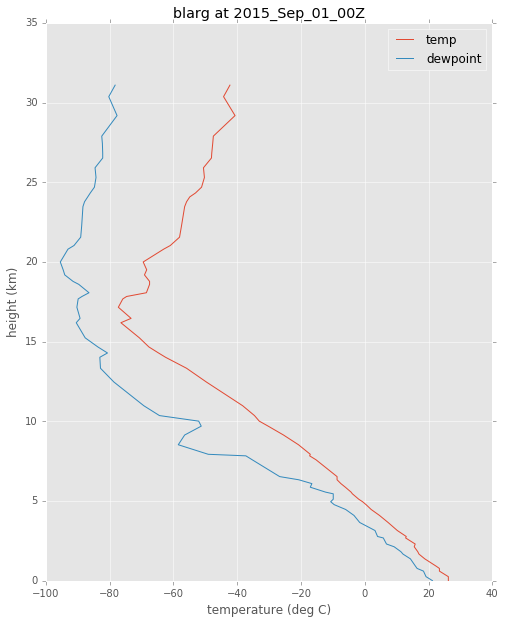

In [18]:
%matplotlib inline
plt.close('all')

#title_string=attr_dict['header']
title_string = "blargh"
index=title_string.find(' Observations at')
location=title_string[:index]
title='{} at {}'.format(location,times[0][2:])

m2km=1.e-3  #convert meters to km
plt.style.use('ggplot')
fig,ax=plt.subplots(1,1,figsize=(8,10))
ax.plot(the_sounding['temp'],the_sounding['hght']*m2km,label='temp')
ax.plot(the_sounding['dwpt'],the_sounding['hght']*m2km,label='dewpoint')
ax.legend()
out=ax.set(xlabel="temperature (deg C)",ylabel="height (km)",
      title =title)#

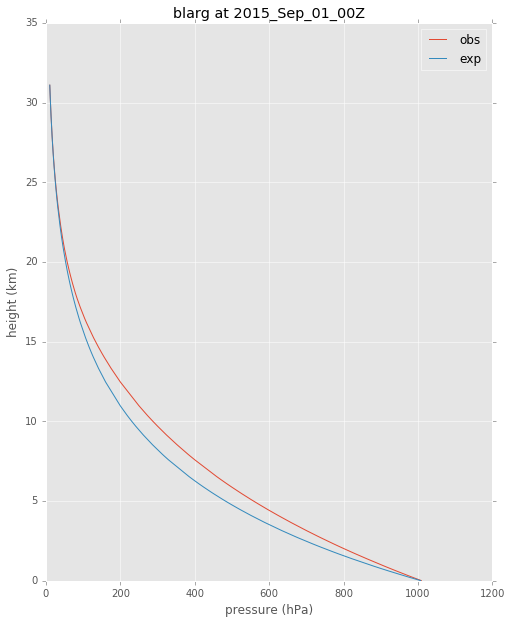

In [19]:
fig,ax=plt.subplots(1,1,figsize=(8,10))
ax.plot(the_sounding['pres'],the_sounding['hght']*m2km,label='obs')
ax.legend()
out=ax.set(xlabel="pressure (hPa)",ylabel="height (km)",
      title =title)
ax.plot(pexp,hght*m2km,label='exp')
ax.legend()

